In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Data preprocessing and loading
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#normalizes the pixel data between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#One-hot encoding the categories
y_train = np.eye(10)[y_train.reshape(-1)]
y_test = np.eye(10)[y_test.reshape(-1)]

print('Length of training set', len(x_train))
print('Length of testing set ', len(x_test))

4423680/4422102 [==============================] - 0s 0us/step
Length of training set 60000
Length of testing set  10000


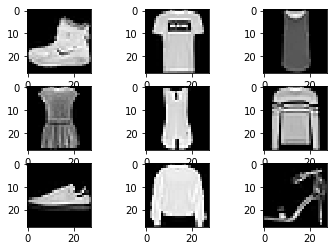

In [0]:
#plotting function taken from https://machinelearningmastery.com/how-to-load-and-visualize-standard-computer-vision-datasets-with-keras/
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
# Model construction
#Model architecture taken from https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/
inputs = Input(shape=(28,28))

x = Reshape((28,28,1))(inputs)

x = Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', strides = (1,1), padding='same')(x)
x = Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', strides = (1,1), padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(rate = .25)(x)

x = Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', strides = (1,1), padding='same')(x)
x = Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', strides = (1,1), padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(rate = .25)(x)

x = Flatten()(x)
x = Dense(units=512, activation = 'relu')(x)
x = Dropout(rate = .5)(x)
outputs = Dense(units = 10, activation = 'softmax')(x) #10 for num_classes in dataset

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#optimal learning rate hyperparameter search algo

lr_model = Model(inputs = inputs, outputs = outputs)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.Adam(lr=1e-6)
lr_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=["accuracy"])
loss_history = lr_model.fit(x_train, y_train, epochs=100, callbacks=[lr_schedule])

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 16s 261us/sample - loss: 2.2479 - acc: 0.2079
Epoch 2/100
60000/60000 [==============================] - 9s 143us/sample - loss: 1.9286 - acc: 0.3954
Epoch 3/100
60000/60000 [==============================] - 9s 145us/sample - loss: 1.4017 - acc: 0.5002
Epoch 4/100
60000/60000 [==============================] - 9s 145us/sample - loss: 1.1629 - acc: 0.5515
Epoch 5/100
60000/60000 [==============================] - 9s 143us/sample - loss: 1.0500 - acc: 0.5918
Epoch 6/100
60000/60000 [==============================] - 9s 143us/sample - loss: 0.9555 - acc: 0.6392
Epoch 7/100
60000/60000 [==============================] - 9s 143us/sample - loss: 0.8781 - acc: 0.6768
Epoch 8/100
60000/60000 [==============================] - 9s 144us/sample - loss: 0.8196 - acc: 0.6995
Epoch 9/100
60000/60000 [==============================] - 9s 143us/sample - loss: 0.7686 - acc: 0.7191
Epoch 10/100
60000/60000 [==============

[1e-06, 0.1, 0, 5]

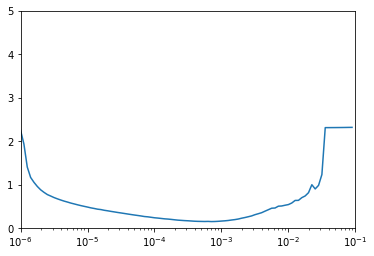

In [0]:
plt.semilogx(loss_history.history["lr"], loss_history.history["loss"])
plt.axis([1e-6, 1e-1, 0, 5])

In [0]:
# Model reconstruction
inputs = Input(shape=(28,28))

x = Reshape((28,28,1))(inputs)

x = Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', strides = (1,1), padding='same')(x)
x = Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', strides = (1,1), padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(rate = .25)(x)

x = Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', strides = (1,1), padding='same')(x)
x = Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', strides = (1,1), padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(rate = .25)(x)

x = Flatten()(x)
x = Dense(units=512, activation = 'relu')(x)
x = Dropout(rate = .5)(x)
outputs = Dense(units = 10, activation = 'softmax')(x) #10 for num_classes in dataset

In [9]:
model = Model(inputs = inputs, outputs = outputs)

optimizer = Adam(learning_rate= 1e-3) #best learning rate found via lr_scheduler

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, validation_split = .1, epochs = 15)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 6s 109us/sample - loss: 0.2332 - acc: 0.9151 - val_loss: 0.2110 - val_acc: 0.9245
Epoch 2/15
54000/54000 [==============================] - 6s 107us/sample - loss: 0.2125 - acc: 0.9230 - val_loss: 0.1951 - val_acc: 0.9282
Epoch 3/15
54000/54000 [==============================] - 6s 105us/sample - loss: 0.1987 - acc: 0.9270 - val_loss: 0.2001 - val_acc: 0.9275
Epoch 4/15
54000/54000 [==============================] - 6s 104us/sample - loss: 0.1796 - acc: 0.9327 - val_loss: 0.1943 - val_acc: 0.9305
Epoch 5/15
54000/54000 [==============================] - 6s 112us/sample - loss: 0.1692 - acc: 0.9373 - val_loss: 0.1876 - val_acc: 0.9323
Epoch 6/15
54000/54000 [==============================] - 6s 117us/sample - loss: 0.1610 - acc: 0.9396 - val_loss: 0.1860 - val_acc: 0.9352
Epoch 7/15
54000/54000 [==============================] - 6s 119us/sample - loss: 0.1506 - acc: 0.9429 - val_lo

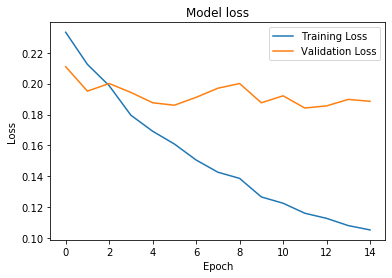

In [10]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

In [11]:
# Model testing
score = model.evaluate(x_test, y_test, batch_size = 64)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.2215 - acc: 0.9343
